# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:  https://www.kaggle.com/datasets/kingabzpro/zombies-apocalypse

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


zombie = pd.read_csv(r"C:\Users\johns\Downloads\zombies.csv")


# Looking at the data
print(zombie.info())
print(zombie.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zombieid    200 non-null    int64 
 1   zombie      200 non-null    object
 2   age         200 non-null    int64 
 3   sex         200 non-null    object
 4   rurality    200 non-null    object
 5   household   200 non-null    int64 
 6   water       200 non-null    int64 
 7   food        200 non-null    object
 8   medication  200 non-null    object
 9   tools       200 non-null    object
 10  firstaid    200 non-null    object
 11  sanitation  200 non-null    object
 12  clothing    126 non-null    object
 13  documents   66 non-null     object
dtypes: int64(4), object(10)
memory usage: 22.0+ KB
None
   zombieid zombie  age     sex rurality  household  water  food  medication  \
0         1  Human   18  Female    Rural          1      0  Food  Medication   
1         2  Human   18    Male    Rur

In [3]:
# shape and data types of the data
print(zombie.shape)
print(zombie.dtypes)

# 200 rows, and 14 columns, 10 stings, 4 ints. 

(200, 14)
zombieid       int64
zombie        object
age            int64
sex           object
rurality      object
household      int64
water          int64
food          object
medication    object
tools         object
firstaid      object
sanitation    object
clothing      object
documents     object
dtype: object


In [4]:
# select numeric columns
zombie_num = zombie.select_dtypes(include=[np.number])
num_cols = zombie_num.columns.values
print(num_cols)

['zombieid' 'age' 'household' 'water']


In [5]:
# select non-numeric columns
zombie_non_num = zombie.select_dtypes(exclude=[np.number])
non_num_cols = zombie_non_num.columns.values
print(non_num_cols)

['zombie' 'sex' 'rurality' 'food' 'medication' 'tools' 'firstaid'
 'sanitation' 'clothing' 'documents']


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

<AxesSubplot:>

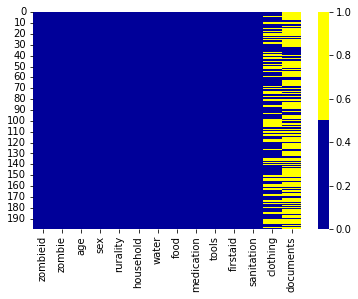

In [7]:
# using a heatmap to visualize the data
cols = zombie.columns[:] # I'm checking all columns since this is a smaller dataframe
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(zombie[cols].isnull(), cmap=sns.color_palette(colours))

# There is missing data in the last two columns (clothing, documents)
# I'm thinking I might still keep the data, but I'm going to look a little farther into it 

In [8]:
# % of missing.
for col in zombie.columns:
    pct_missing = np.mean(zombie[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# 37% of clothing is missing data, 67% of documents is missing data.  

zombieid - 0%
zombie - 0%
age - 0%
sex - 0%
rurality - 0%
household - 0%
water - 0%
food - 0%
medication - 0%
tools - 0%
firstaid - 0%
sanitation - 0%
clothing - 37%
documents - 67%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<AxesSubplot:>

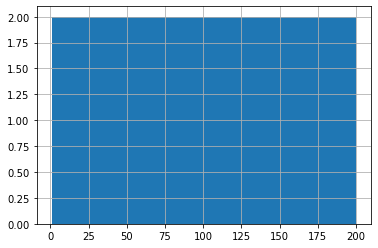

In [10]:
# checking numeric columns for outliers

zombie['zombieid'].hist(bins = 100)

<AxesSubplot:>

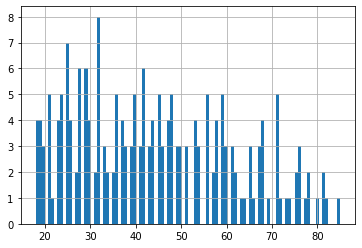

In [11]:
zombie['age'].hist(bins = 100)

<AxesSubplot:>

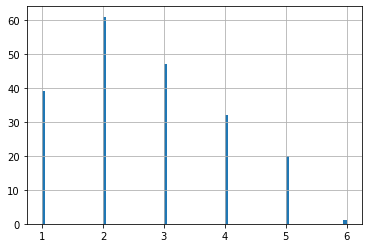

In [12]:
zombie['household'].hist(bins = 100)

<AxesSubplot:>

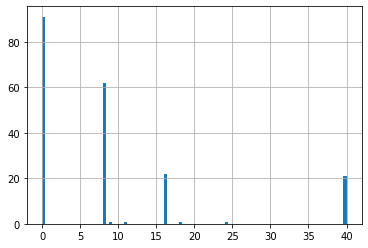

In [13]:
zombie['water'].hist(bins = 100)

<AxesSubplot:>

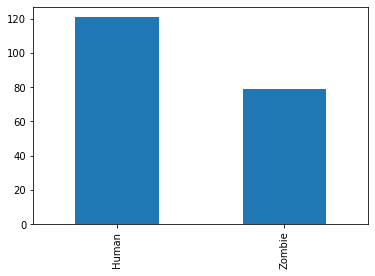

In [14]:
# checking categorical columns for irregular data
zombie['zombie'].value_counts().plot.bar()

<AxesSubplot:>

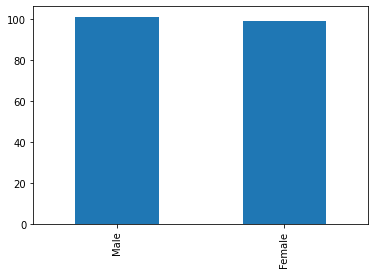

In [15]:
zombie['sex'].value_counts().plot.bar()

<AxesSubplot:>

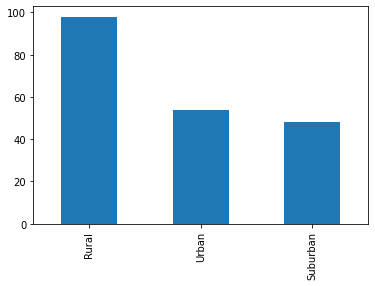

In [16]:
zombie['rurality'].value_counts().plot.bar()

<AxesSubplot:>

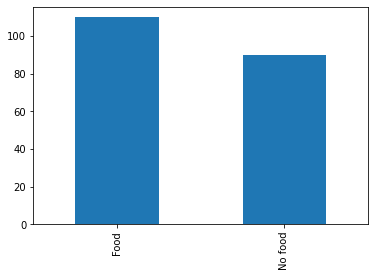

In [17]:
zombie['food'].value_counts().plot.bar()

<AxesSubplot:>

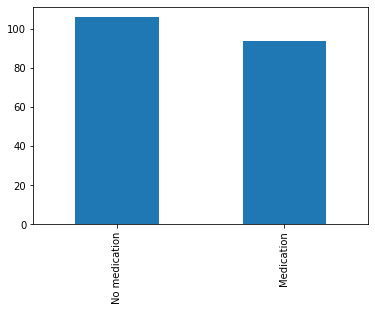

In [18]:
zombie['medication'].value_counts().plot.bar()

<AxesSubplot:>

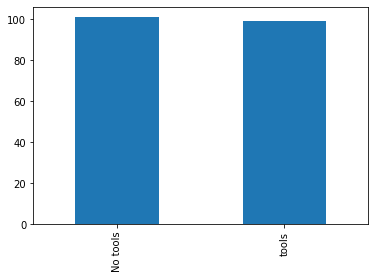

In [19]:
zombie['tools'].value_counts().plot.bar()

<AxesSubplot:>

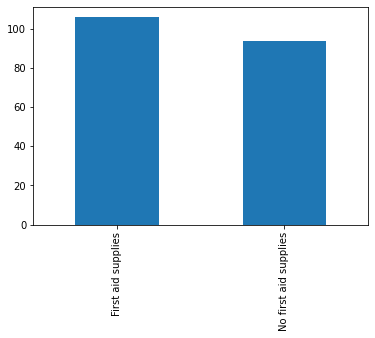

In [20]:
zombie['firstaid'].value_counts().plot.bar()

<AxesSubplot:>

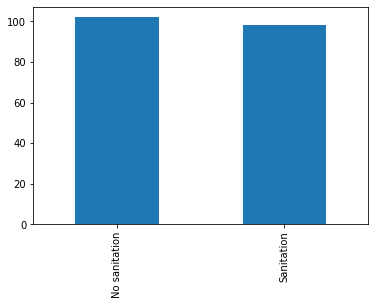

In [21]:
zombie['sanitation'].value_counts().plot.bar()

<AxesSubplot:>

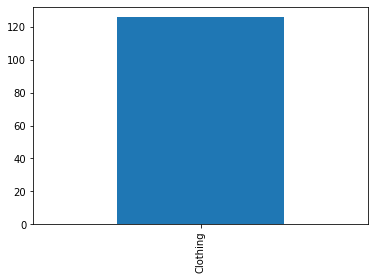

In [22]:
zombie['clothing'].value_counts().plot.bar()

<AxesSubplot:>

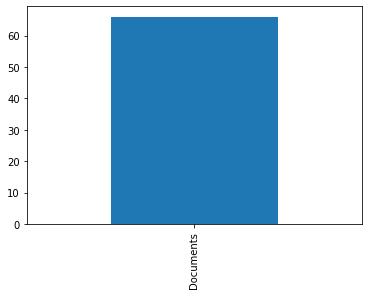

In [23]:
zombie['documents'].value_counts().plot.bar()

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [24]:
# we know that column 'zombieid' is unique, but what if we drop it?
zombie_dedupped = zombie.drop('zombieid', axis=1).drop_duplicates()


print(zombie.shape)
print(zombie_dedupped.shape)

# I found 1 row of duplicates????

(200, 14)
(199, 13)


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [25]:
# Looking through all columns looking for Inconsistent Data, but eberything seems to look great.  

zombie['zombie'].value_counts(dropna=False)

Human     121
Zombie     79
Name: zombie, dtype: int64

In [26]:
zombie['age'].value_counts(dropna=False)

32    8
25    7
42    6
29    6
28    6
     ..
77    1
72    1
69    1
63    1
85    1
Name: age, Length: 62, dtype: int64

In [27]:
zombie['sex'].value_counts(dropna=False)

Male      101
Female     99
Name: sex, dtype: int64

In [28]:
zombie['rurality'].value_counts(dropna=False)

Rural       98
Urban       54
Suburban    48
Name: rurality, dtype: int64

In [29]:
zombie['household'].value_counts(dropna=False)

2    61
3    47
1    39
4    32
5    20
6     1
Name: household, dtype: int64

In [30]:
zombie['water'].value_counts(dropna=False)

0     91
8     62
16    22
40    21
24     1
18     1
11     1
9      1
Name: water, dtype: int64

In [31]:
zombie['food'].value_counts(dropna=False)

Food       110
No food     90
Name: food, dtype: int64

In [32]:
zombie['medication'].value_counts(dropna=False)

No medication    106
Medication        94
Name: medication, dtype: int64

In [33]:
zombie['tools'].value_counts(dropna=False)

No tools    101
tools        99
Name: tools, dtype: int64

In [34]:
zombie['firstaid'].value_counts(dropna=False)

First aid supplies       106
No first aid supplies     94
Name: firstaid, dtype: int64

In [35]:
zombie['sanitation'].value_counts(dropna=False)

No sanitation    102
Sanitation        98
Name: sanitation, dtype: int64

In [36]:
zombie['clothing'].value_counts(dropna=False)

Clothing    126
NaN          74
Name: clothing, dtype: int64

In [37]:
zombie['documents'].value_counts(dropna=False)

NaN          134
Documents     66
Name: documents, dtype: int64

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

A: Overall, this dataset is very clean and straight forward. I was only able to find one type of dirty data which was missing data.  I found that in the clothing column and in the documents column.  Clothing had 37% missing, while documents had 67% missing. I decided to leave the information in the data set because the datatset is not a large one, and I think I can work around it fairly easy.  Plus, I want to use the data that was found in those categories to compare to the other ones to see if the data found did have an impact on survival rate. 

2. Did the process of cleaning your data give you new insights into your dataset?

A: Yes and no, Since this dataset is quite simple, the eda that I did for the last checkpoint was very similar.  I could tell there was not much cleaning that was going to need to be done. But I think it was good for me to go over the data a second time and look and the values and double check the nulls that I knew would be present.  

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

A:  I'm honestly excited to make these visualizations for this data set.  I feel like this will be fun visually.  My only concern with this set, once again, that it may be to simple of a dataset. I do wish there was more information provided in each category to give it more of a challenge and more insight to the zombie to human ratio. 